Actual Kd =  46.224012547268515
Predicted Kd = 55.26 Elbo Loss = 1.26837158203125
Predicted Kd = 95.41 Elbo Loss = -0.019554615020751953
Predicted Kd = 105.55 Elbo Loss = -0.2414795160293579
Predicted Kd = 96.3 Elbo Loss = 0.2990424633026123
Predicted Kd = 97.47 Elbo Loss = 0.6285604238510132
Predicted Kd = 81.06 Elbo Loss = 0.6465581655502319
Predicted Kd = 127.07 Elbo Loss = -0.005181670188903809
Predicted Kd = 91.2 Elbo Loss = 0.08767533302307129
Predicted Kd = 91.9 Elbo Loss = 0.5166497230529785
Predicted Kd = 84.91 Elbo Loss = 0.1390225887298584


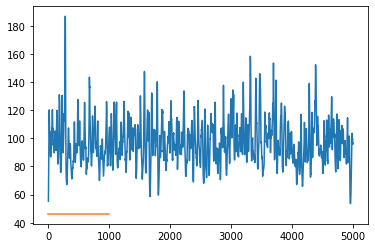

In [23]:
import numpy as np
import pandas as pd
import torch

import pyro
import pyro.distributions as dist
import pyro.optim as optim
import pyro.nn as nn
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.autoguide import AutoMultivariateNormal, init_to_mean

from torch.distributions import constraints

from CurveSensitivity import GenerateMichaelisMenten

import matplotlib.pyplot as plt
import seaborn as sns

# generate fake data
kd = np.random.uniform(0,100)
vmax = np.random.uniform(0,1)
noise = np.random.uniform(0,0.05)
K = np.random.uniform(1,4)
nPoints = np.random.randint(6,10)
x,y = GenerateMichaelisMenten(kd, vmax, noise, K,nPoints)
x, y = torch.tensor(x), torch.tensor(y)

pyro.clear_param_store()


def model(x,y):
    kd = pyro.sample('kd', dist.Normal(100,50))
    vmax = pyro.sample('vmax',dist.Normal(0.5,0.1))
    y_pred = (vmax*x)/(kd + x)
    return y_pred

def guide(x,y):
    kd_loc = pyro.param('kd_loc', torch.tensor(50.),constraint=constraints.positive)
    kd_scale = pyro.param('kd_scale',torch.tensor(50.),constraint=constraints.positive)
    vmax_loc = pyro.param('vmax_loc', torch.tensor(0.5),constraint=constraints.positive)
    vmax_scale = pyro.param('vmax_scale',torch.tensor(0.1),constraint=constraints.positive)
    
    kd = pyro.sample('kd', dist.Normal(kd_loc,kd_scale))
    vmax = pyro.sample('vmax',dist.Normal(vmax_loc,vmax_scale))
    y_pred = (vmax*x)/(kd + x)
    return y_pred



svi = SVI(model,
          guide,
          optim.Adam({"lr": 0.1}),
          loss=Trace_ELBO())

pyro.clear_param_store()

predictions = []

print('Actual Kd = ',kd)
for i in range(5000):
    elbo = svi.step(x,y)
    if i % 500 == 0:
        #print("Elbo loss: {}".format(elbo))
        print('Predicted Kd = {} Elbo Loss = {}'.format(round(pyro.param('kd_loc').item(), 2),elbo))
    predictions.append(pyro.param('kd_loc').item())
        
#kds = [pyro.sample('x',dist.Normal(pyro.param('kd_loc'), pyro.param('kd_scale'))).item() for i in range(1000)]

#sns.distplot(kds)
#plt.plot([kd,kd],[0,0.01])
plt.plot(predictions)
plt.plot([0,1000],[kd,kd])
plt.show()

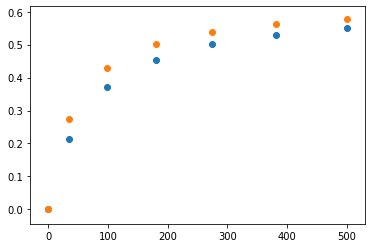

In [24]:
plt.scatter(x,svi.model(x,y).numpy())
plt.scatter(x,y)


plt.show()

In [32]:
import numpyro
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS
from jax import random, vmap

rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
rng_key_

array([2718843009, 1272950319], dtype=uint32)

In [52]:
dist.Gamma(3.0, 1.0).sample(rng_key).item()

0.771451473236084